# import packages

In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import edlib
import json
import subprocess
from multiprocessing import Pool
import matplotlib.pyplot as plt
import seaborn as sns
ad_seq=[('N', 'A'), ('N', 'T'), ('N', 'G'), ('N', 'C')]
import scanpy as sc
from anndata import AnnData
from scipy.sparse import csr_matrix

In [134]:
sample='c58_8_rec_S8'

In [199]:
sample='c58_4_rec2_S4'

In [203]:
sample='c58_4_rec_S6'

In [197]:
position='anchors'

In [172]:
position='targets'

In [226]:
indir

'/n/data2/dfci/medonc/cwu/meb521/slideseq/reconstruct/230928/'

In [228]:
indir='/n/data2/dfci/medonc/cwu/meb521/slideseq/reconstruct/'

In [231]:
indir='/n/data2/dfci/medonc/cwu/meb521/slideseq/reconstruct/c55_4/'

In [233]:
samples=['c55_32','c55_4']

In [215]:
for sample in samples[2:]:
    print(sample)

c58_4_rec2_S4
c58_4_rec_S6
c58_5_rec2_S5
c58_5_rec_S7
c58_8_rec2_S6
c58_8_rec_S8


In [218]:
for sample in samples[2:]:
    print(sample)
    
    dir_split=f'{indir}/{sample}/split/'
    
    files=os.listdir(dir_split)
    jsons = sorted([f for f in files if f'{position}.json' in f])

    data_agg={}
    for i in range(len(jsons[:1])):
        with open(f'{dir_split}{jsons[i]}', 'r') as json_file:
            data_sub = json.load(json_file)
            #print(jsons[i],len(data_sub))
            lens=[]
            for k in data_sub:
                lens.append(len(data_sub[k]))
            print(np.sum(lens))
    
    fastq=f'{indir}/{sample}/split/{sample}_R1_001.part_016.fastq'

    command=f'samtools view -c {fastq}'
    subprocess.call(command,shell=True)

    print(30*'-')
    

c58_4_rec2_S4
1083594
1625115
------------------------------
c58_4_rec_S6
367392
567662
------------------------------
c58_5_rec2_S5
1191659
1805776
------------------------------
c58_5_rec_S7
359151
585552
------------------------------
c58_8_rec2_S6
1093580
1616013
------------------------------
c58_8_rec_S8
313676
513398
------------------------------


In [234]:
for sample in samples:
    print(sample)
    
    dir_split=f'{indir}/{sample}/split/'
    
    files=os.listdir(dir_split)
    jsons = sorted([f for f in files if f'{position}.json' in f])

    data_agg={}
    for i in range(len(jsons[:1])):
        with open(f'{dir_split}{jsons[i]}', 'r') as json_file:
            data_sub = json.load(json_file)
            #print(jsons[i],len(data_sub))
            lens=[]
            for k in data_sub:
                lens.append(len(data_sub[k]))
            print(np.sum(lens))
    
    fastq=f'{indir}/{sample}/split/{sample}_R1_001.part_016.fastq'

    command=f'samtools view -c {fastq}'
    subprocess.call(command,shell=True)

    print(30*'-')
    

c55_32
5324107
16094921
------------------------------
c55_4
6563549
18484050
------------------------------


In [236]:
print(5324107/16094921)
print(6563549/18484050)

0.330794230055556
0.35509257981881676


In [225]:
print('c58_4_rec2_S4','% reads with both UP',np.round(1083594/1625115*100,2))
print('c58_4_rec_S6','% reads with both UP',np.round(367392/567662*100,2))
print('c58_5_rec2_S5','% reads with both UP',np.round(1191659/1805776*100,2))
print('c58_5_rec_S7','% reads with both UP',np.round(359151/585552*100,2))
print('c58_8_rec2_S6','% reads with both UP',np.round(1093580/1616013*100,2))
print('c58_8_rec_S8','% reads with both UP',np.round(313676/513398*100,2))

c58_4_rec2_S4 % reads with both UP 66.68
c58_4_rec_S6 % reads with both UP 64.72
c58_5_rec2_S5 % reads with both UP 65.99
c58_5_rec_S7 % reads with both UP 61.34
c58_8_rec2_S6 % reads with both UP 67.67
c58_8_rec_S8 % reads with both UP 61.1


In [196]:
------------------------------
c58_4_rec_S6
367392
567662
------------------------------
c58_5_rec2_S5
1191659
1805776
------------------------------
c58_5_rec_S7
359151
585552
------------------------------
c58_8_rec2_S6
1093580
1616013
------------------------------
c58_8_rec_S8
313676
513398
------------------------------

0.6667798894232101

In [208]:
367392/567662

0.6472020321952148

In [174]:
len(data_sub)

77011

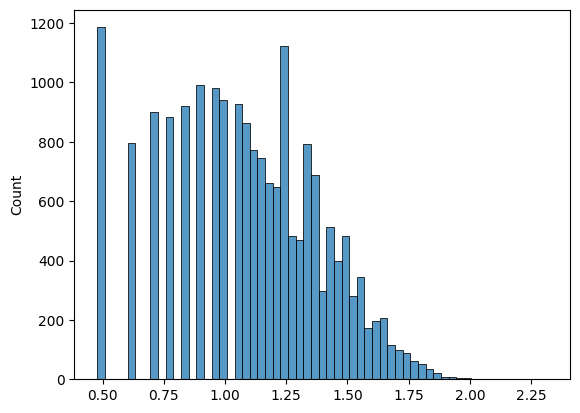

In [175]:
sns.histplot(np.log10([l for l in lens if l>2]));

In [166]:
len(data_sub)

87803

In [152]:
lens=[]
for k in data_sub:
    lens.append(len(data_sub[k]))

In [154]:
np.sum(lens)

254063

In [143]:
position='quads'

dir_split=f'{indir}/{sample}/split/'
files=os.listdir(dir_split)
jsons = sorted([f for f in files if f'{position}.json' in f])

data_agg={}

for i in tqdm(range(len(jsons[:1]))):
    with open(f'{dir_split}{jsons[i]}', 'r') as json_file:
        data_sub = json.load(json_file)
        print(jsons[i],len(data_sub))
        for k in data_sub:
            if data_agg.get(k) is not None:
                data_agg[k].extend(data_sub[k])
            else:
                data_agg[k]=data_sub[k]


100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

c58_4_rec_S6.part_001_quads.json 35692


In [144]:
len(data_sub)

35692

In [123]:
len(data_sub)

19518

In [124]:
print(jsons[i],len(data_sub))

c58_8_rec2_S6.part_001_quads.json 19518


In [112]:
data_sub['GGGGTCCGCCAGAC']

[['GGATCACC', 'TTGCCACCTCTTCG'],
 ['CCGCGAAG', 'TACACGCGTCGTGA'],
 ['GAGTCCTG', 'CTAACCAAGTGTAA'],
 ['GGTCCTAG', 'AGTCGTGCCGAAGT'],
 ['TCCGGGGA', 'TTACTAGCGTGCTT'],
 ['TCCGGGGA', 'TTACTAGCGTGCTT'],
 ['CACAGGTC', 'CCCGACCGGCAAGA'],
 ['GAACCGCA', 'AAGGCGCAAGGAAC'],
 ['ACGGGCTA', 'CCTCTGTCACATTG'],
 ['GATGTTAC', 'CTAACCAAGTGTAA'],
 ['AGTGAACG', 'CCGGCCAATCGCAG'],
 ['AGTTGGCG', 'CACCGCCAAGACCT'],
 ['CCCTCGTC', 'TTGCCACCTCTTCG'],
 ['GCGAGCGC', 'CCTCTGTCACATTG'],
 ['GACCGCCA', 'AAACTACGACCAAC'],
 ['AAGTGTAC', 'TTACTAGCGTGCTT'],
 ['CGCACTCG', 'ATCTACAGCTACCC'],
 ['GGTTGCGC', 'AAGGCGCAAGGAAC'],
 ['TCTCAAAC', 'ACGTACATTATCAC'],
 ['AACCATGA', 'AAAATTATGAACCT']]

In [145]:
lens=[]
for k in data_sub:
    lens.append(len(data_sub[k]))

<AxesSubplot:ylabel='Count'>

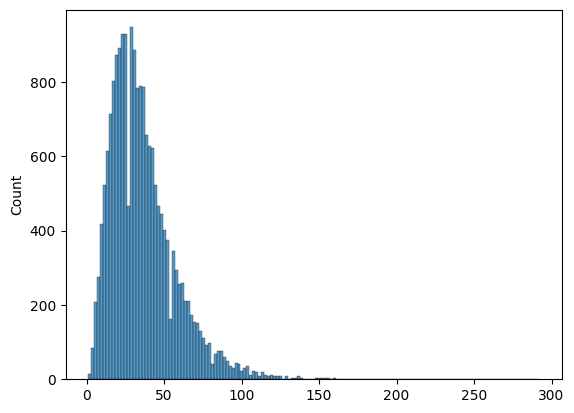

In [128]:
sns.histplot(lens)

<AxesSubplot:ylabel='Count'>

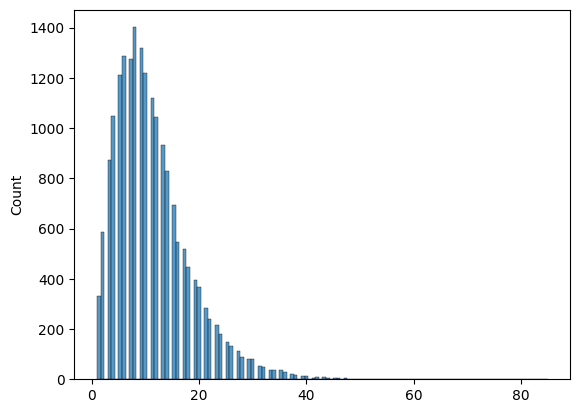

In [132]:
sns.histplot(lens)

<AxesSubplot:ylabel='Count'>

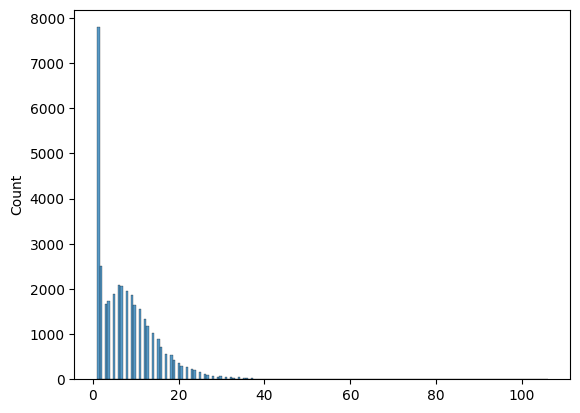

In [146]:
sns.histplot(lens)

In [133]:
np.sum(lens)

217710

In [147]:
np.sum(lens)

282842

In [141]:
np.sum(lens)

712453

In [ ]:
np.sum(lens)

In [105]:
def make_count_mtx(indir,sample):
    
    position='quads'

    dir_split=f'{indir}/{sample}/split/'
    files=os.listdir(dir_split)
    jsons = sorted([f for f in files if f'{position}.json' in f])

    data_agg={}

    for i in tqdm(range(len(jsons[:1]))):
        with open(f'{dir_split}{jsons[i]}', 'r') as json_file:
            data_sub = json.load(json_file)
            print(jsons[i],len(data_sub))
            for k in data_sub:
                if data_agg.get(k) is not None:
                    data_agg[k].extend(data_sub[k])
                else:
                    data_agg[k]=data_sub[k]

    a_white = pd.read_csv(f'{indir}/{sample}/{sample}_anchors_wl.csv.gz',index_col=1)#['bc']
    t_white = pd.read_csv(f'{indir}/{sample}/{sample}_targets_wl.csv.gz',index_col=1)#['bc']
    
    counts_np = np.zeros( (len(a_white),len(t_white)) )
    counts_df = pd.DataFrame(counts_np, index=a_white.index, columns=t_white.index)

    all_list=[]
    for a_bc in tqdm(a_white.index[:1000]):

        umi_tbc=data_agg[a_bc]
        umi_bc_dic={}
        for a in umi_tbc:
            if umi_bc_dic.get(a[0]) is not None:
                umi_bc_dic[a[0]].append(a[1])
            else:
                umi_bc_dic[a[0]]=[a[1]]

        t_bc_cnt={}
        for k in umi_bc_dic:
            umi_reads=len(umi_bc_dic[k])
            if umi_reads>2:
                uni_t_bc=set(umi_bc_dic[k])
                if len(uni_t_bc)>1:
                    bcs,cnts=np.unique(umi_bc_dic[k],return_counts=True)
                    if np.max(cnts/umi_reads)>.74:
                        t_bc=bcs[np.argmax(cnts/umi_reads)]
                        seq_counter(t_bc_cnt,t_bc)
                else:
                    t_bc=list(uni_t_bc)[0]
                    seq_counter(t_bc_cnt,t_bc)

        counts_df.loc[a_bc,list(t_bc_cnt.keys())]=list(t_bc_cnt.values())
        
    counts_df=AnnData(counts_df,dtype='float32')
    counts_df.X = csr_matrix(counts_df.X)
    #sc.pp.filter_genes(counts_df, min_counts=1)
    #sc.pp.filter_cells(counts_df, min_counts=1)
    #sc.pp.calculate_qc_metrics(counts_df, percent_top=None, log1p=None, inplace=True)
    counts_df.write_h5ad(f'{indir}/{sample}/{sample}_counts_filtered.h5ad')
    return counts_df

In [21]:
indir='/n/data2/dfci/medonc/cwu/meb521/slideseq/reconstruct/230928/'

In [12]:
samples=sorted([f for f in os.listdir(input_dir) if '.' not in f])

In [ ]:
samples

['c58_13_rec_S7',
 'c58_18_rec_S8',
 'c58_4_rec2_S4',
 'c58_4_rec_S6',
 'c58_5_rec2_S5',
 'c58_5_rec_S7',
 'c58_8_rec2_S6',
 'c58_8_rec_S8']

In [ ]:
sample='c58_4_rec_S6'

In [ ]:
sample='c58_4_rec2_S4'

In [15]:
def seq_counter(seq_dict,seq_instance):
    
    if seq_dict.get(seq_instance) is None:
        seq_dict[seq_instance] = 1
    else:
        seq_dict[seq_instance]+= 1


In [16]:
adata=make_count_mtx(input_dir,sample)

100%|██████████| 1/1 [00:00<00:00,  1.62it/s]


c58_4_rec_S6.part_001_quads.json 35692


100%|██████████| 1000/1000 [00:00<00:00, 1534.42it/s]


In [74]:
adata.X

<26209x20547 sparse matrix of type '<class 'numpy.float32'>'
	with 2445 stored elements in Compressed Sparse Row format>

In [75]:
adata.X

<26209x20547 sparse matrix of type '<class 'numpy.float32'>'
	with 2445 stored elements in Compressed Sparse Row format>

In [77]:
position='targets'
pd.read_csv(f'{input_dir}/{sample}/{sample}_{position}_wl.csv.gz',index_col=0)

,bc,umi_cnt,read_cnt,log10_read_cnt,log10_umi_cnt,dup_rate
1624,AATGACACCCACAA,2291,3140,3.496930,3.360025,1.370581
228,AAGAACACACTGTG,2042,2844,3.453930,3.310056,1.392752
2551,TATCCGAGTCAGTT,1958,2726,3.435526,3.291813,1.392237
1662,CACCAGAATTGAGC,1859,2556,3.407561,3.269279,1.374933
374,CTCTTTCTAGGGCC,1697,2318,3.365113,3.229682,1.365940
...,...,...,...,...,...,...
53898,CATGACAGTGATGA,2,5,0.698970,0.301030,2.500000
53603,GGTCAGCCAAAAAA,2,8,0.903090,0.301030,4.000000
53604,TACTTCACACTGCA,2,5,0.698970,0.301030,2.500000
58978,CAGACCCTGCTTCG,2,5,0.698970,0.301030,2.500000


In [78]:
from scipy.ndimage import gaussian_filter1d
from scipy.signal import find_peaks


In [79]:
samples

['c58_13_rec_S7',
 'c58_18_rec_S8',
 'c58_4_rec2_S4',
 'c58_4_rec_S6',
 'c58_5_rec2_S5',
 'c58_5_rec_S7',
 'c58_8_rec2_S6',
 'c58_8_rec_S8']

In [80]:
sample='c58_4_rec_S6'

In [67]:
sample='c58_4_rec2_S4'

In [82]:
from matplotlib.backends.backend_pdf import PdfPages


In [94]:
qc_pdfs = PdfPages(f'{indir}/{sample}/{sample}_QC.pdf')

In [95]:
position='targets'

In [97]:
position='anchors'

[ 5 48] [0.13982872 1.34235568]


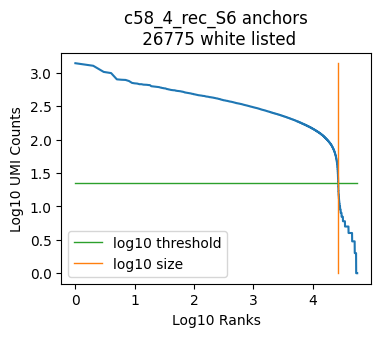

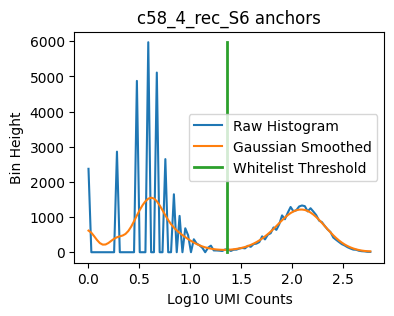

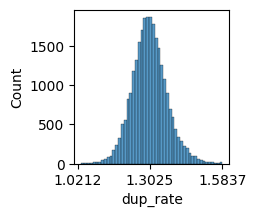

In [98]:
read_cnt=pd.read_csv(f'{indir}/{sample}/{sample}_agg_read_cnt_{position}.csv')
umi_cnt=pd.read_csv(f'{indir}/{sample}/{sample}_agg_umi_cnt_{position}.csv')
umi_cnt.columns=['bc','umi_cnt']
read_cnt.columns=['bc','read_cnt']
agg_bcs=pd.merge(umi_cnt,read_cnt,left_on='bc',right_on='bc',how='inner')
agg_bcs['log10_read_cnt']=np.log10(agg_bcs['read_cnt'])
agg_bcs['log10_umi_cnt']=np.log10(agg_bcs['umi_cnt'])
agg_bcs['dup_rate']=agg_bcs['read_cnt']/agg_bcs['umi_cnt']
agg_bcs=agg_bcs.sort_values(by='umi_cnt',ascending=False)

sub=agg_bcs.iloc[20:100000].copy()  # select top 100k bc except first 20
x = np.histogram(sub.log10_umi_cnt, 100) # fit a histogram
smooth = gaussian_filter1d(x[0], 3) # smooth histogram
peak_idx,_=find_peaks(-smooth) # find the local minimum
print(peak_idx,x[1][:-1][peak_idx])
mean_hist=(x[1][1:][peak_idx]+x[1][:-1][peak_idx])/2 # take the mid point of point before and after

mean_hist=mean_hist[-1] # take the last value in list of local minima (could be more than one)

wl_df=agg_bcs[agg_bcs.log10_umi_cnt>=mean_hist].copy()
wl_df.to_csv(f'{indir}/{sample}/{sample}_{position}_wl.csv.gz',compression='infer')
#wl_reads=wl_df.read_cnt.sum()
white_list_size=wl_df.shape[0]

plt.figure(figsize=(4,3))
log10_ranks=np.log10(np.arange(1,len(agg_bcs)+1))
log10_cnts=agg_bcs.log10_umi_cnt
plt.plot(log10_ranks,log10_cnts)#,label='Rank Plot of Reads')
plt.xlabel('Log10 Ranks')
plt.ylabel('Log10 UMI Counts')
plt.title(f'{sample} {position}\n {white_list_size} white listed')
plt.plot([0, log10_ranks[-1]], [mean_hist, mean_hist], linewidth=1,label='log10 threshold',c='tab:green')
log10_wl=np.log10(white_list_size)
plt.plot([log10_wl, log10_wl], [log10_cnts.min(), log10_cnts.max()], linewidth=1,label='log10 size',c='tab:orange')
plt.legend(loc="best");
#plt.savefig(f'{indir}/{sample}/{sample}_{position}_rankplot.pdf',bbox_inches='tight');

pp.savefig(bbox_inches='tight')


plt.figure(figsize=(4,3))
plt.plot(x[1][:-1],x[0], label='Raw Histogram')
plt.plot(x[1][:-1],smooth, label='Gaussian Smoothed')
plt.xlabel('Log10 UMI Counts')
plt.ylabel('Bin Height')
plt.title(f'{sample} {position}')
plt.plot([mean_hist, mean_hist], [0, np.max(x[0])], linewidth=2,label='Whitelist Threshold')
plt.legend(loc="best");
#plt.savefig(f'{indir}/{sample}/{sample}_{position}_histogram.pdf',bbox_inches='tight');
pp.savefig()
plt.figure(figsize=(2,2))
mean=wl_df.dup_rate.mean()
n_std=3
width=wl_df.dup_rate.std()*n_std
ticks=np.linspace(mean-width,mean+width,n_std)
sns.histplot(wl_df[(wl_df.dup_rate>mean-width) & (wl_df.dup_rate<mean+width) ].dup_rate,bins=50)
plt.xticks(ticks)
#plt.savefig(f'{indir}/{sample}/{sample}_{position}_duprate.pdf',bbox_inches='tight');

pp.savefig(bbox_inches='tight')

In [99]:
pp.close()

In [60]:
mean_hist=(x[1][1:][peak_idx]+x[1][:-1][peak_idx])/2 # take the mid point of point before and after


In [100]:
wf=pd.read_csv('/n/data2/dfci/medonc/cwu/meb521/slideseq/reconstruct/230928/c58_8_rec_S8/c58_8_rec_S8_targets_wl.csv.gz')

In [103]:
wf=pd.read_csv('/n/data2/dfci/medonc/cwu/meb521/slideseq/reconstruct/230928/c58_8_rec_S8/c58_8_rec_S8_anchors_wl.csv.gz')

In [102]:
wf

,Unnamed: 0,bc,umi_cnt,read_cnt,log10_read_cnt,log10_umi_cnt,dup_rate
0,918,ATTTATTGGCGAGC,1378,1894,3.277380,3.139249,1.374456
1,341,TCACCCGCTATCTA,1304,1765,3.246745,3.115278,1.353528
2,1869,AACATACCGGAATA,1255,1644,3.215902,3.098644,1.309960
3,490,CACCAATATCTTTA,1160,1623,3.210319,3.064458,1.399138
4,2885,CATCTTGCGGTGAG,1135,1552,3.190892,3.054996,1.367401
...,...,...,...,...,...,...,...
19771,19164,GGGCAATGCGTCAA,21,25,1.397940,1.322219,1.190476
19772,35753,AAGTACAAAATGCT,21,31,1.491362,1.322219,1.476190
19773,23501,CGTGACGGGTCTAA,21,30,1.477121,1.322219,1.428571
19774,27856,GGGGACTATCTCCA,21,27,1.431364,1.322219,1.285714


In [104]:
wf

,Unnamed: 0,bc,umi_cnt,read_cnt,log10_read_cnt,log10_umi_cnt,dup_rate
0,1949,TGCCGTGGAAGTGT,1122,1517,3.180986,3.049993,1.352050
1,3479,ATATGACTGACACA,1096,1460,3.164353,3.039811,1.332117
2,173,CCATCACCTGGATT,999,1319,3.120245,2.999565,1.320320
3,8107,ATTTCCAGCTCTGA,935,1243,3.094471,2.970812,1.329412
4,1397,AATACATCAGGAAC,932,1232,3.090611,2.969416,1.321888
...,...,...,...,...,...,...,...
19469,7422,GAACTACCATCAAA,26,34,1.531479,1.414973,1.307692
19470,24765,ATTCCGGTAAATAG,26,32,1.505150,1.414973,1.230769
19471,22783,TAACATATAACAAA,26,32,1.505150,1.414973,1.230769
19472,25998,GAATTGGGACCGCT,26,37,1.568202,1.414973,1.423077


In [74]:
wl_df

,bc,umi_cnt,read_cnt,log10_read_cnt,log10_umi_cnt,dup_rate
4387,TGGATGAGAATTTT,1391,1846,3.266232,3.143327,1.327103
3815,ACTAACGATTTAAT,1274,1652,3.218010,3.105169,1.296703
5501,GACATAAATACCGT,1031,1347,3.129368,3.013259,1.306499
5704,GCCGGTTCGAATGT,990,1292,3.111263,2.995635,1.305051
1795,TCCAGCATACGAGC,798,1077,3.032216,2.902003,1.349624
...,...,...,...,...,...,...
17121,TCCATGGGAGGTCA,23,25,1.397940,1.361728,1.086957
1926,AATTTGGAATCTCA,23,34,1.531479,1.361728,1.478261
34139,ACCGTTGTCGGTAC,23,29,1.462398,1.361728,1.260870
30593,CGCGCATGTGGTCT,23,30,1.477121,1.361728,1.304348


In [56]:
mean_hist

array([0.15381159, 1.35633855])

In [49]:
x[1][1:][peak_idx]

array([0.16779446, 1.37032142])

In [50]:
x[1][:-1][peak_idx]

array([0.13982872, 1.34235568])

In [51]:
mean_hist

array([0.15381159, 1.35633855])

In [63]:
wl_df=agg_bcs[agg_bcs.log10_umi_cnt>=mean_hist[0]].copy()


In [64]:
wl_df

,bc,umi_cnt,read_cnt,log10_read_cnt,log10_umi_cnt,dup_rate
3201,TGGATGAGAATTTT,3985,5289,3.723374,3.600428,1.327227
2248,ACTAACGATTTAAT,3646,4697,3.671821,3.561817,1.288261
5887,GACATAAATACCGT,2863,3716,3.570076,3.456821,1.297939
2290,GCCGGTTCGAATGT,2862,3682,3.566084,3.456670,1.286513
3943,TCCAGCATACGAGC,2423,3123,3.494572,3.384353,1.288898
...,...,...,...,...,...,...
40747,CGGCAAAAAGCACC,62,72,1.857332,1.792392,1.161290
35199,GGTAGGGCAGGGAT,62,78,1.892095,1.792392,1.258065
27747,GAGACTATAAAAAA,62,78,1.892095,1.792392,1.258065
42488,CAGATGGTAGTGCT,62,80,1.903090,1.792392,1.290323


In [29]:
print(peak_idx,x[1][:-1][peak_idx])

[40] [1.77747547]


In [31]:
len(peak_idx)

1

In [40]:
print(peak_idx[-1],x[1][:-1][peak_idx[-1]])

48 1.3423556799410061


In [ ]:
mean_hist=mean_hist[0]
wl_df=agg_bcs[agg_bcs.log10_umi_cnt>=mean_hist].copy()

In [ ]:
adata=pd.read_table('Puck_230719_04.all_illumina.digital_expression.txt.gz',nrows=1,index_col=0)#,usecols=['CTTCCGATGTTCCC','TCCGATCTTCCCGA'])

In [4]:
from scipy.sparse import csr_matrix

In [5]:
adata=adata.T

In [1]:
adata.obs

NameError: name 'adata' is not defined

In [7]:
adata.X = csr_matrix(adata.X)

In [8]:
sc.pp.filter_genes(adata, min_cells=10)
sc.pp.filter_cells(adata, min_genes=5)
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=None, inplace=True)

In [11]:
adata.var

,n_cells,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
0610009B22Rik,26,26,0.001557,99.850049,27.0
0610009E02Rik,52,52,0.003114,99.700098,54.0
0610010F05Rik,29,29,0.001903,99.832747,33.0
0610012G03Rik,63,63,0.003633,99.636657,63.0
1110004F10Rik,42,42,0.002422,99.757771,42.0
...,...,...,...,...,...
mt-Tl2,24,24,0.001384,99.861584,24.0
mt-Tm,34,34,0.002019,99.803910,35.0
mt-Tp,19,19,0.001153,99.890420,20.0
mt-Tq,12,12,0.000750,99.930792,13.0


In [2]:
#adata.write_h5ad('Puck_230719_32.all_illumina.h5ad',compression='gzip')

In [ ]:
sns.histplot(np.log10(adata.obs.n_genes_by_counts))

In [218]:
f'{indir}/{sample}/counts.h5ad'

'/n/data2/dfci/medonc/cwu/meb521/slideseq/reconstruct/c55_4/counts.h5ad'

In [219]:
'/n/data2/dfci/medonc/cwu/meb521/slideseq/reconstruct/c55_4/'

'/n/data2/dfci/medonc/cwu/meb521/slideseq/reconstruct/c55_4/'

In [4]:
adata=sc.read_h5ad(f'{indir}/{sample}/counts.h5ad')

adata.obs # anchors
adata.var # targets
sns.histplot(np.log10(adata.var.n_cells_by_counts))
sns.histplot(np.log10(adata.obs.n_genes_by_counts))
sns.histplot(np.log10(adata.obs.n_counts))

In [ ]:
all_illumina=pd.read_table('Puck_230719_32.all_illumina.digital_expression.txt.gz')

In [3]:
def UP_edit_pass(read_seq,max_dist):
    edit=edlib.align(read_seq[8:26],UP_seq,'HW','path',max_dist,ad_seq)
    boolean_pass = edit['editDistance']>=0 and edit['editDistance']<=max_dist
    return(boolean_pass)

In [3]:
recon_dir = '/n/data2/dfci/medonc/cwu/meb521/slideseq/reconstruct'
files=os.listdir(recon_dir)

In [4]:
recon_dir = '/n/data2/dfci/medonc/cwu/meb521/slideseq/reconstruct/slideseq_pipeline_out/Puck_230719_04/'
files=os.listdir(recon_dir)

In [4]:
series_head='c55'
puck_id='Puck_230719_04'
series_n=str(int(puck_id.split('_')[-1]))
puck_series=f'{series_head}_{series_n}'

In [45]:
#pd.read_table(f'{recon_dir}/slideseq_pipeline_out/{puck_id}/BeadBarcodes.txt')

In [83]:
with open(f'{recon_dir}/slideseq_pipeline_out/{puck_id}/BeadBarcodes.txt') as fh:
    raw_bcs = ["".join(line.strip().split(",")) for line in fh]

In [91]:
with open(f'{recon_dir}/slideseq_pipeline_out/{puck_id}/BeadLocations.txt') as fh:
    x = np.array([float(v) for v in fh.readline().strip().split(",")])
    y = np.array([float(v) for v in fh.readline().strip().split(",")])
    xy = np.vstack((x, y)).T

In [108]:
bc_loc=pd.DataFrame(raw_bcs)

In [110]:
bc_loc['x']=x
bc_loc['y']=y

In [113]:
bc_loc=bc_loc.set_index(0)

In [114]:
ok_barcodes = [not set(bc).issubset({'T', 'N'}) for bc in raw_bcs]

In [117]:
bc_loc=bc_loc.iloc[ok_barcodes]

In [118]:
#bcs = [bc for ok, bc in zip(ok_barcodes, raw_bcs) if ok]

In [5]:
targets = pd.read_csv(f'{recon_dir}/{puck_series}/{puck_series}_targets_wl.csv.gz')['bc'].tolist()

In [6]:
anchors=pd.read_csv(f'{recon_dir}/{puck_series}/{puck_series}_anchors_wl.csv.gz')['bc'].tolist()

# compare raw illumina and anchors

In [10]:
adata=sc.read('Puck_230719_04.all_illumina.h5ad')

In [16]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=None, inplace=True)

In [12]:
adata.obs.index

Index(['TTTTTTTTTTTTTT', 'CTTCCGATGTTCCC', 'AAAAAAAAAAAAAA', 'TCCGATCTTCCCGA',
       'TCTTCCGACGTTCC', 'TTAATCGATGTCAG', 'GAAAAAAAAAAAAA', 'CAAAAAAAAAAAAA',
       'CTTCCGATAAAAAA', 'TAAAAAAAAAAAAA',
       ...
       'GTAGCTTGGATAAT', 'AAGCCCCGTCGACG', 'CTTACTCCCGTAGG', 'ACGGCATCTTACAC',
       'GACGGCTGGCCATG', 'CTTTCATGAGTAGT', 'AGACTCCTAACGGA', 'TCTTCCCACCTCAG',
       'GGACCTCGACAATC', 'GCAGGTGATTTCGG'],
      dtype='object', length=250852)

In [13]:
col_tar=list(set(adata.obs.index) & set(targets))

In [14]:
col_anc=list(set(adata.obs.index) & set(anchors))

In [15]:
len(col_tar),len(col_anc)

(4701, 15796)

In [18]:
adata.obs[adata.obs.index.isin(col_tar)]

,n_genes_by_counts,total_counts
CATTCGTTCCTGAA,68,90.0
CCGGCTCGGAAATT,71,88.0
CGCAATGACCTACT,61,83.0
TGGATTCCGCTGCA,56,79.0
CAGACGATGGAGGC,57,74.0
...,...,...
AGATCGATGTCTCA,10,10.0
GGATGTGTGTAAAT,7,10.0
GTCGACAAACCACA,9,10.0
TACCCTCCAATAGG,9,10.0


<AxesSubplot:xlabel='n_genes_by_counts', ylabel='Count'>

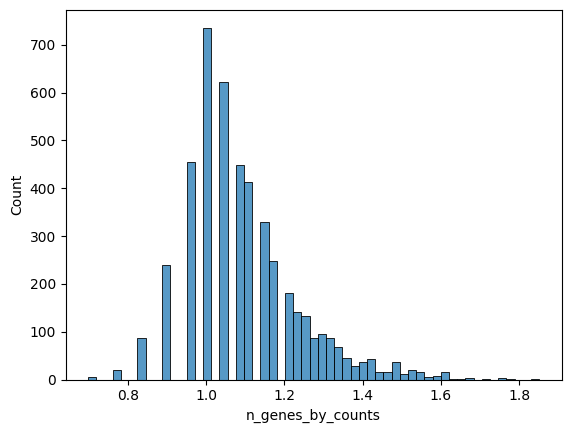

In [20]:
sns.histplot(np.log10(adata.obs[adata.obs.index.isin(col_tar)].n_genes_by_counts))

<AxesSubplot:xlabel='n_genes_by_counts', ylabel='Count'>

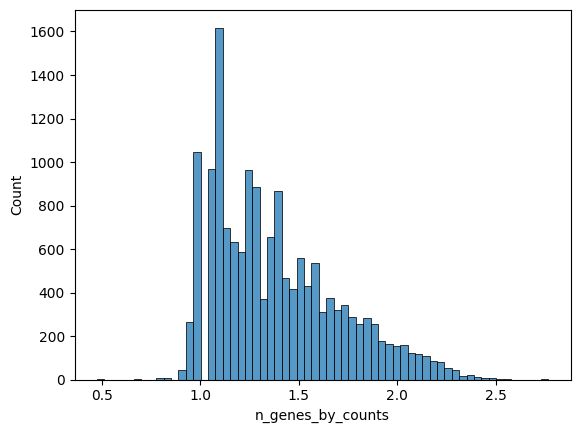

In [21]:
sns.histplot(np.log10(adata.obs[adata.obs.index.isin(col_anc)].n_genes_by_counts))

In [12]:
shared=list(set(col_anc) | set(col_tar))

In [13]:
shared=['GENE']+shared

In [48]:
len(targets),len(anchors)

(20547, 26209)

In [14]:
len(targets),len(anchors)

(20547, 26209)

In [15]:
len(shared)

20496

In [16]:
adata=pd.read_table('Puck_230719_04.all_illumina.digital_expression.txt.gz',index_col=0,usecols=shared[:10])

In [181]:
len(set(targets) & set(bc_loc.index))

3806

In [182]:
len(set(anchors) & set(bc_loc.index))

1664

In [16]:
len(set(anchors) & set(adata.obs.index))

14004

In [183]:
len(anchors),len(targets)

(18420, 39763)

In [184]:
3806/1664,39763/18420

(2.2872596153846154, 2.158686210640608)

In [186]:
len(targets)

39763

In [176]:
bcs_insitu=bc_loc.index.tolist()

In [282]:
splits=np.array_split(targets, 16)

In [283]:
len(splits)

16

In [284]:
splits[0]

array(['TGATGATCTTAGTT', 'ACCGGAGGTCCAAT', 'TATGCCGGGGTGGG', ...,
       'TAAGAGACCTTTGG', 'TTATCATATATAGG', 'AGTGAGAATTGTGA'], dtype='<U14')

In [197]:
len(targets)

39763

In [199]:
7953+7953+7953+7952+7952

39763

In [203]:
2485/300

8.283333333333333

In [301]:
max_dist=2
bc_t_dict={}
for bc_t in tqdm(targets):
    bc_t_dict[bc_t]=[]
    for bc in bcs_insitu:
        edit=edlib.align(bc,bc_t,'HW','path',max_dist) 
        dist=edit['editDistance']
        boolean_pass = dist>=0 and dist<=max_dist
        cigar=edit['cigar']
        if boolean_pass and 'I' not in cigar and 'D' not in cigar:
            bc_t_dict[bc_t].extend([bc,bc_loc.loc[bc].tolist(),dist,cigar,find_error_locs(cigar)])
        

  0%|          | 138/39763 [00:27<2:10:22,  5.07it/s]


KeyboardInterrupt: 

In [167]:
matched=[]
for bc_t in bc_t_dict:
    
    num_match=len(bc_t_dict[bc_t])
    #print(num_match)
    matched.append(num_match)


In [168]:
len(matched)

34

In [169]:
len([m for m in matched if m>0])

28

In [206]:
np.array([899.5, 3579.1])-np.array([908.1, 3590.3])

array([ -8.6, -11.2])

In [207]:
(8.6**2+11.2**2)**.5

14.120906486483081

In [209]:
import re

In [265]:
cigar_string='2=1X6=2X4='

In [294]:
def find_error_locs(cigar_string):
    errors=[]
    position=1
    for cigar in re.findall(r'(\d+)([=X])', cigar_string):
        ops.append( cigar )
        length = int(cigar[0])
        operation = cigar[1]
        if operation == 'X':
            for i in range(length):
                error_pos=position+i
                errors.append(error_pos)
        position += length
    return(errors)


In [296]:
find_error_locs(cigar_string)

[3, 10, 11]

In [267]:
ops=pd.DataFrame(ops)

In [268]:
ops[0]=ops[0].astype(int)

In [269]:
ops['pos']=ops[0].cumsum()

In [264]:
ops

,0,1,pos
0,2,=,2
1,1,X,3
2,6,=,9
3,1,X,10
4,4,=,14


In [272]:
ops_X=ops[ops[1]=='X']

In [273]:
ops_X.

,0,1,pos
1,1,X,3
3,2,X,11


In [274]:
14

14

In [228]:
cigar

('4', '=')

In [217]:
    if operation in ('=', 'X'):
        # Match or mismatch, check for errors in the query sequence
        for i in range(length):
            if reference_sequence[position + i] != query_sequence[position + i]:
                print(f"Error at position {position + i}: {reference_sequence[position + i]} -> {query_sequence[position + i]}")

NameError: name 'query_sequence' is not defined

In [298]:
find_error_locs('1=1X1=1X10=')

[2, 4]

In [299]:
find_error_locs('1=1X7=1X4=')

[2, 10]

In [300]:
find_error_locs('1X5=1X7=')

[1, 7]

In [ ]:
ATTGATTCGATTAG
AATGATTCGGTTAG
AATGATTCGCTTAG

In [302]:
for bc_t in bc_t_dict:
    print(f'----------{bc_t}---------')
    print(bc_t_dict[bc_t])

----------TGATGATCTTAGTT---------
[]
----------ACCGGAGGTCCAAT---------
['ACGGGAGGTGCAAT', [3921.6, 2384.2], 2, '2=1X6=1X4=', [3, 10]]
----------TATGCCGGGGTGGG---------
['TTTGCCGGCGTGGG', [564.93, 2861.4], 2, '1=1X6=1X5=', [2, 9]]
----------TACGCACCCGTCTC---------
['TTCGCACCCGTCTC', [899.5, 3579.1], 1, '1=1X12=', [2], 'TTCCCACCCGTCTC', [908.1, 3590.3], 2, '1=1X1=1X10=', [2, 4]]
----------AGTAAACTCCGGAA---------
[]
----------CTGTACCGTCTTAT---------
['CCGTACCGTGTTAT', [1705.9, 3761.0], 2, '1=1X7=1X4=', [2, 10]]
----------ATTGATTCGATTAG---------
['AATGATTCGGTTAG', [2727.1, 3385.2], 2, '1=1X7=1X4=', [2, 10], 'AATGATTCGCTTAG', [2726.3, 3391.6], 2, '1=1X7=1X4=', [2, 10]]
----------CATGTATCGAACTT---------
[]
----------CAAGACGCAGAAGA---------
['AAAGACCCAGAAGA', [1777.3, 2469.9], 2, '1X5=1X7=', [1, 7]]
----------CGCTAGACTTACGG---------
[]
----------GATCCAACTTTGAT---------
[]
----------TCTCATCTAAATAC---------
['TCTCATCTCAATAC', [2184.6, 3621.5], 1, '8=1X5=', [9], 'TCTAATCTAAATAC', [2189.6, 3617.7

In [126]:
for bc_t in targets[:10]:
    print(f'----------{bc_t}---------')
    print(bc_t_dict[bc_t])

----------TGATGATCTTAGTT---------
[]
----------ACCGGAGGTCCAAT---------
['ACGGGAGGTGCAAT', 2, [2727.1, 3385.2], '2=1X6=1X4=']
----------TATGCCGGGGTGGG---------
['TTTGCCGGCGTGGG', 2, [2727.1, 3385.2], '1=1X6=1X5=']
----------TACGCACCCGTCTC---------
['TTCGCACCCGTCTC', 1, [2727.1, 3385.2], '1=1X12=', 'TTCCCACCCGTCTC', 2, [2727.1, 3385.2], '1=1X1=1X10=']
----------AGTAAACTCCGGAA---------
[]
----------CTGTACCGTCTTAT---------
['CCGTACCGTGTTAT', 2, [2727.1, 3385.2], '1=1X7=1X4=']
----------ATTGATTCGATTAG---------
['AATGATTCGGTTAG', 2, [2727.1, 3385.2], '1=1X7=1X4=', 'AATGATTCGCTTAG', 2, [2727.1, 3385.2], '1=1X7=1X4=']
----------CATGTATCGAACTT---------
[]
----------CAAGACGCAGAAGA---------
['AAAGACCCAGAAGA', 2, [2727.1, 3385.2], '1X5=1X7=']
----------CGCTAGACTTACGG---------
[]


In [ ]:
ATTGATTCGATTAG
AATGATTCGGTTAG
AATGATTCGCTTAG

In [123]:
bc_loc.loc['AATGATTCGGTTAG'].tolist()

[2727.1, 3385.2]

In [122]:
bc_loc.loc['AATGATTCGCTTAG']

x    2726.3
y    3391.6
Name: AATGATTCGCTTAG, dtype: float64